In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://homepages.inf.ed.ac.uk/rbf/HIPR2/eqns/eqnlog2.gif")

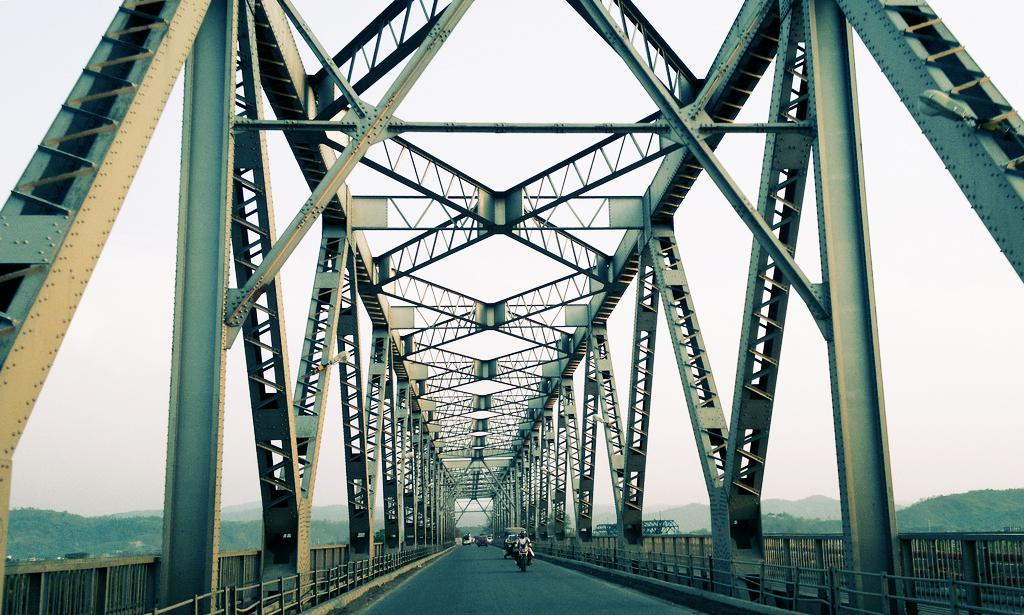

In [3]:
import numpy as np
from PIL import Image as image
from IPython.display import display
from io import BytesIO

img = np.array(image.open('bridge.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [4]:
def laplacianOfGaussian(shape=(3, 3), sigma=1):
    m,n = [(s-1)/2 for s in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    LOG = -1/(np.pi*(sigma**4))*(1-(x**2+y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    su = LOG.sum()
    if not su:
        LOG/=su
    return LOG

In [5]:
Image(url= "https://cf.ppt-online.org/files/slide/u/UxLuhmzOyr5QVi9EsYRJfFjgM0BDqIX8SWkpKw/slide-42.jpg")

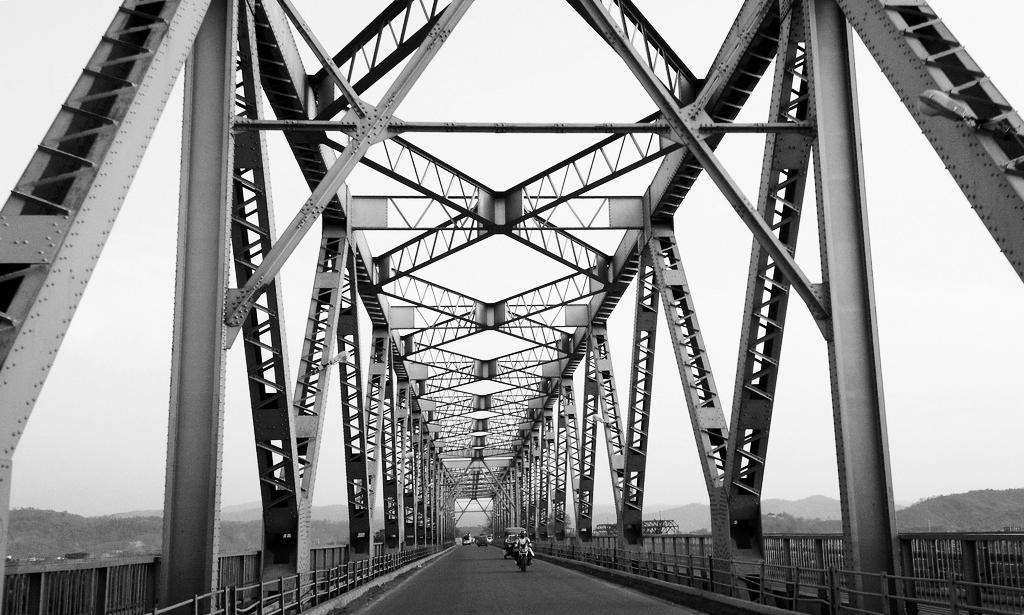

In [6]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

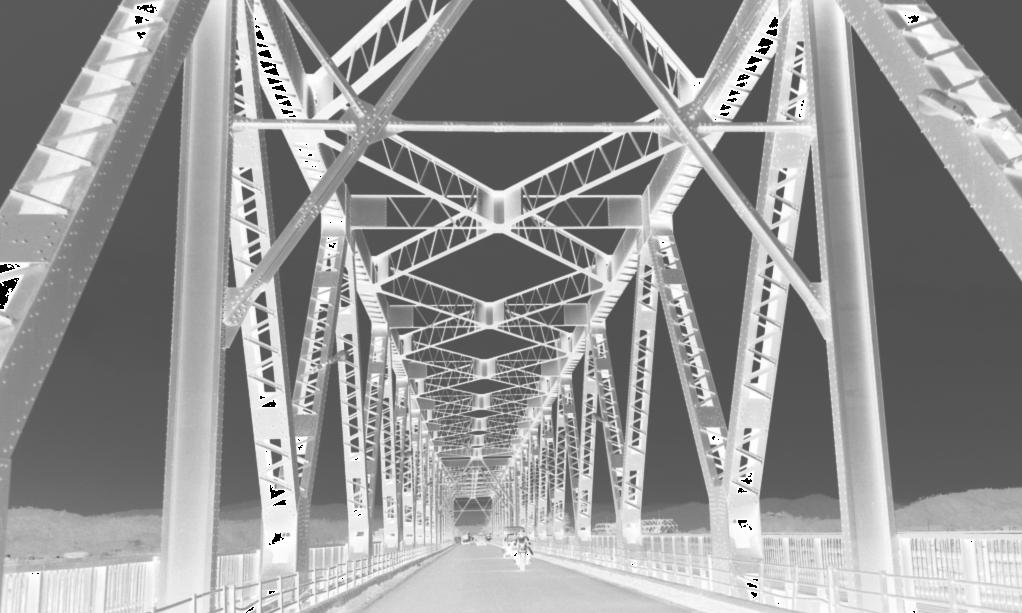

In [7]:
##### SIGMA = 1 #####

LOG1 = laplacianOfGaussian()
log1 = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        log1[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], LOG1))

f = BytesIO()
image.fromarray(log1.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

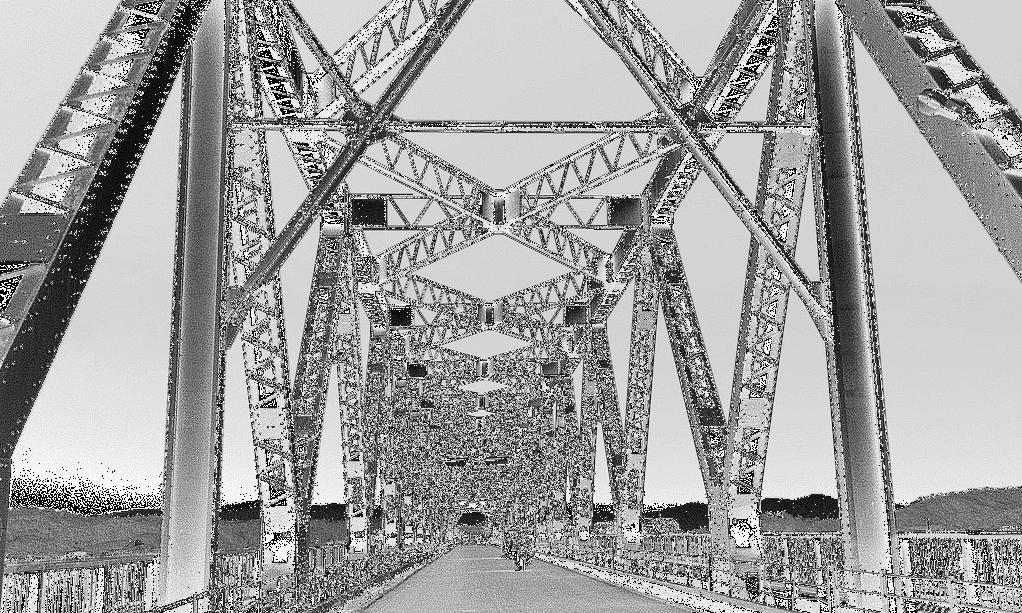

In [9]:
##### SIGMA = 2 #####

LOG2 = laplacianOfGaussian(sigma=0.5)
log2 = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        log2[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], LOG2))

f = BytesIO()
image.fromarray(log2.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))